In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

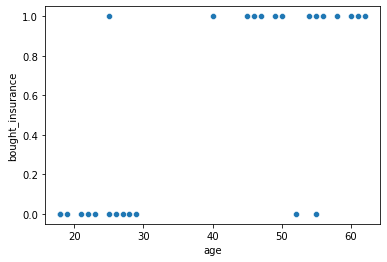

In [4]:
sns.scatterplot(x='age', y='bought_insurance', data=df)

<AxesSubplot:>

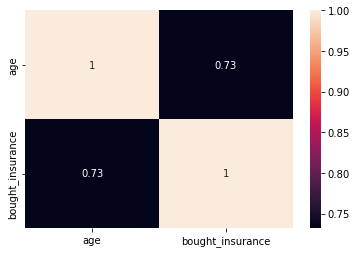

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
x = df.drop('bought_insurance',axis=1)
y=df['bought_insurance']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [9]:
classifier = LogisticRegression()

In [10]:
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [11]:
ypred=classifier.predict(xtest)

In [12]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

In [13]:
f1 = f1_score(ytest,ypred)
prec = precision_score(ytest,ypred)
rec = recall_score(ytest,ypred)

In [15]:
print(f"Precision: {prec}\nRecall: {rec}\nF1 Score: {f1}")


Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


hr data (exercise)

In [56]:
hr = pd.read_csv('hrData.csv')

In [57]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
hr_salary = pd.get_dummies(hr['salary'],drop_first=True)


In [59]:
hr_dept = pd.get_dummies(hr['Department'],drop_first=True)

In [61]:
hr = pd.concat([hr,hr_salary,hr_dept],axis=1)
hr.columns
hr.drop(['salary','Department'],axis=1,inplace=True)


In [62]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'low', 'medium', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical', 'low', 'medium', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

In [63]:
x = hr.drop('left',axis=1)
y = hr['left']

<AxesSubplot:>

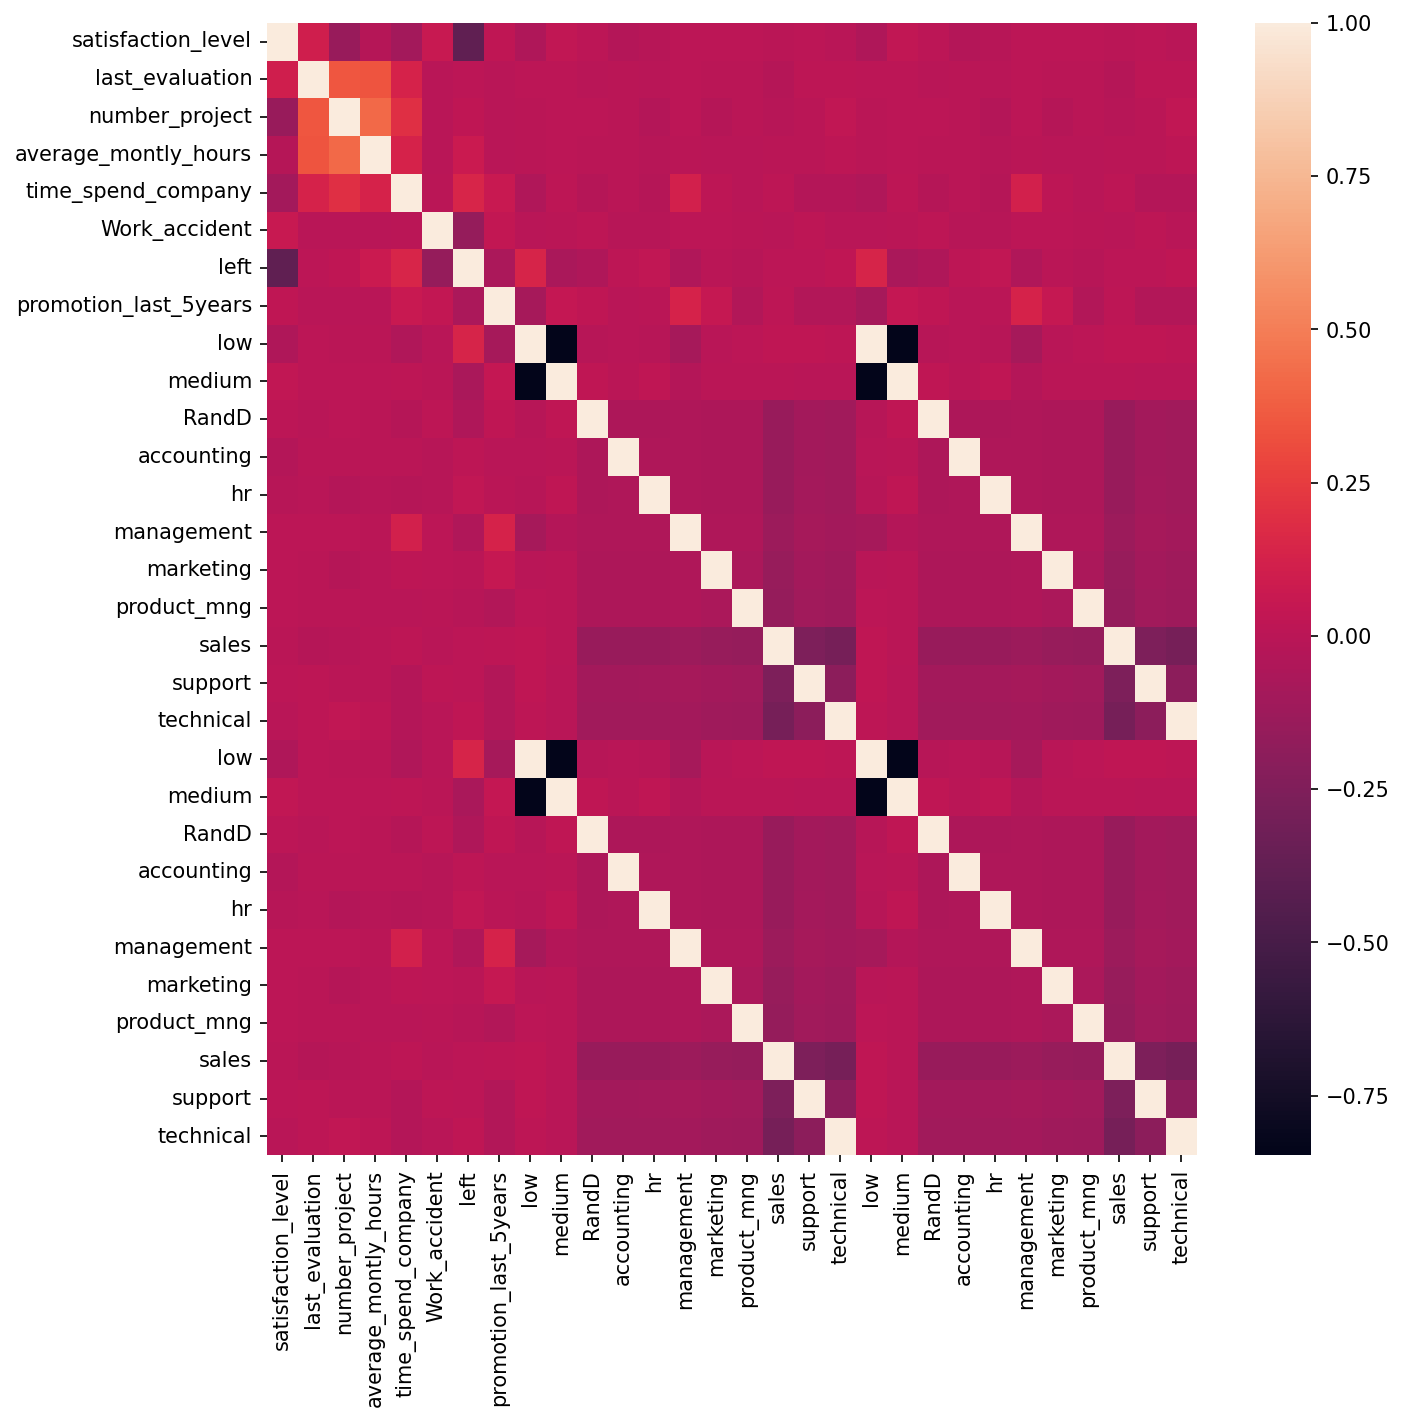

In [65]:
plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(hr.corr(),)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [69]:
hrClassifier = LogisticRegression(max_iter=1000000)
hrClassifier.fit(xtrain,ytrain)
ypred = hrClassifier.predict(xtest)

In [71]:
hr_f1 = f1_score(ytest,ypred)
hr_prec = precision_score(ytest,ypred)
hr_rec = recall_score(ytest,ypred)
print(f"Precision: {hr_prec}\nRecall: {hr_rec}\nF1 Score: {hr_f1}")

Precision: 0.6304849884526559
Recall: 0.3699186991869919
F1 Score: 0.46626814688300594
